In [45]:
# Import setup
from msc_code.scripts.notebook_setup import *

In [ ]:
# Import aggregate study data
import_path = os.path.join(PROC_DATA_DIR, "data_extraction", "all_aggregate_data.csv")
data = pd.read_csv(import_path)

In [47]:
# Output paths
report_path = os.path.join(OUTPUT_DIR, "reports", "data_extraction")
figures_path = os.path.join(report_path, "figures")

In [ ]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 100 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   96 non-null     int64  
 1   Study_ID                                     96 non-null     int64  
 2   First_Author                                 94 non-null     object 
 3   Publication_Year                             96 non-null     int64  
 4   Title                                        96 non-null     object 
 5   Study_Design                                 86 non-null     object 
 6   Population_Type                              16 non-null     object 
 7   Study_Setting                                89 non-null     object 
 8   Study_Location                               91 non-null     object 
 9   DOI                                          71 non-null     object 
 10  Dat

In [49]:
included_data = data[data['Exclude'] != True].copy()

<Axes: title={'center': 'Study Designs'}, ylabel='Study_Design'>

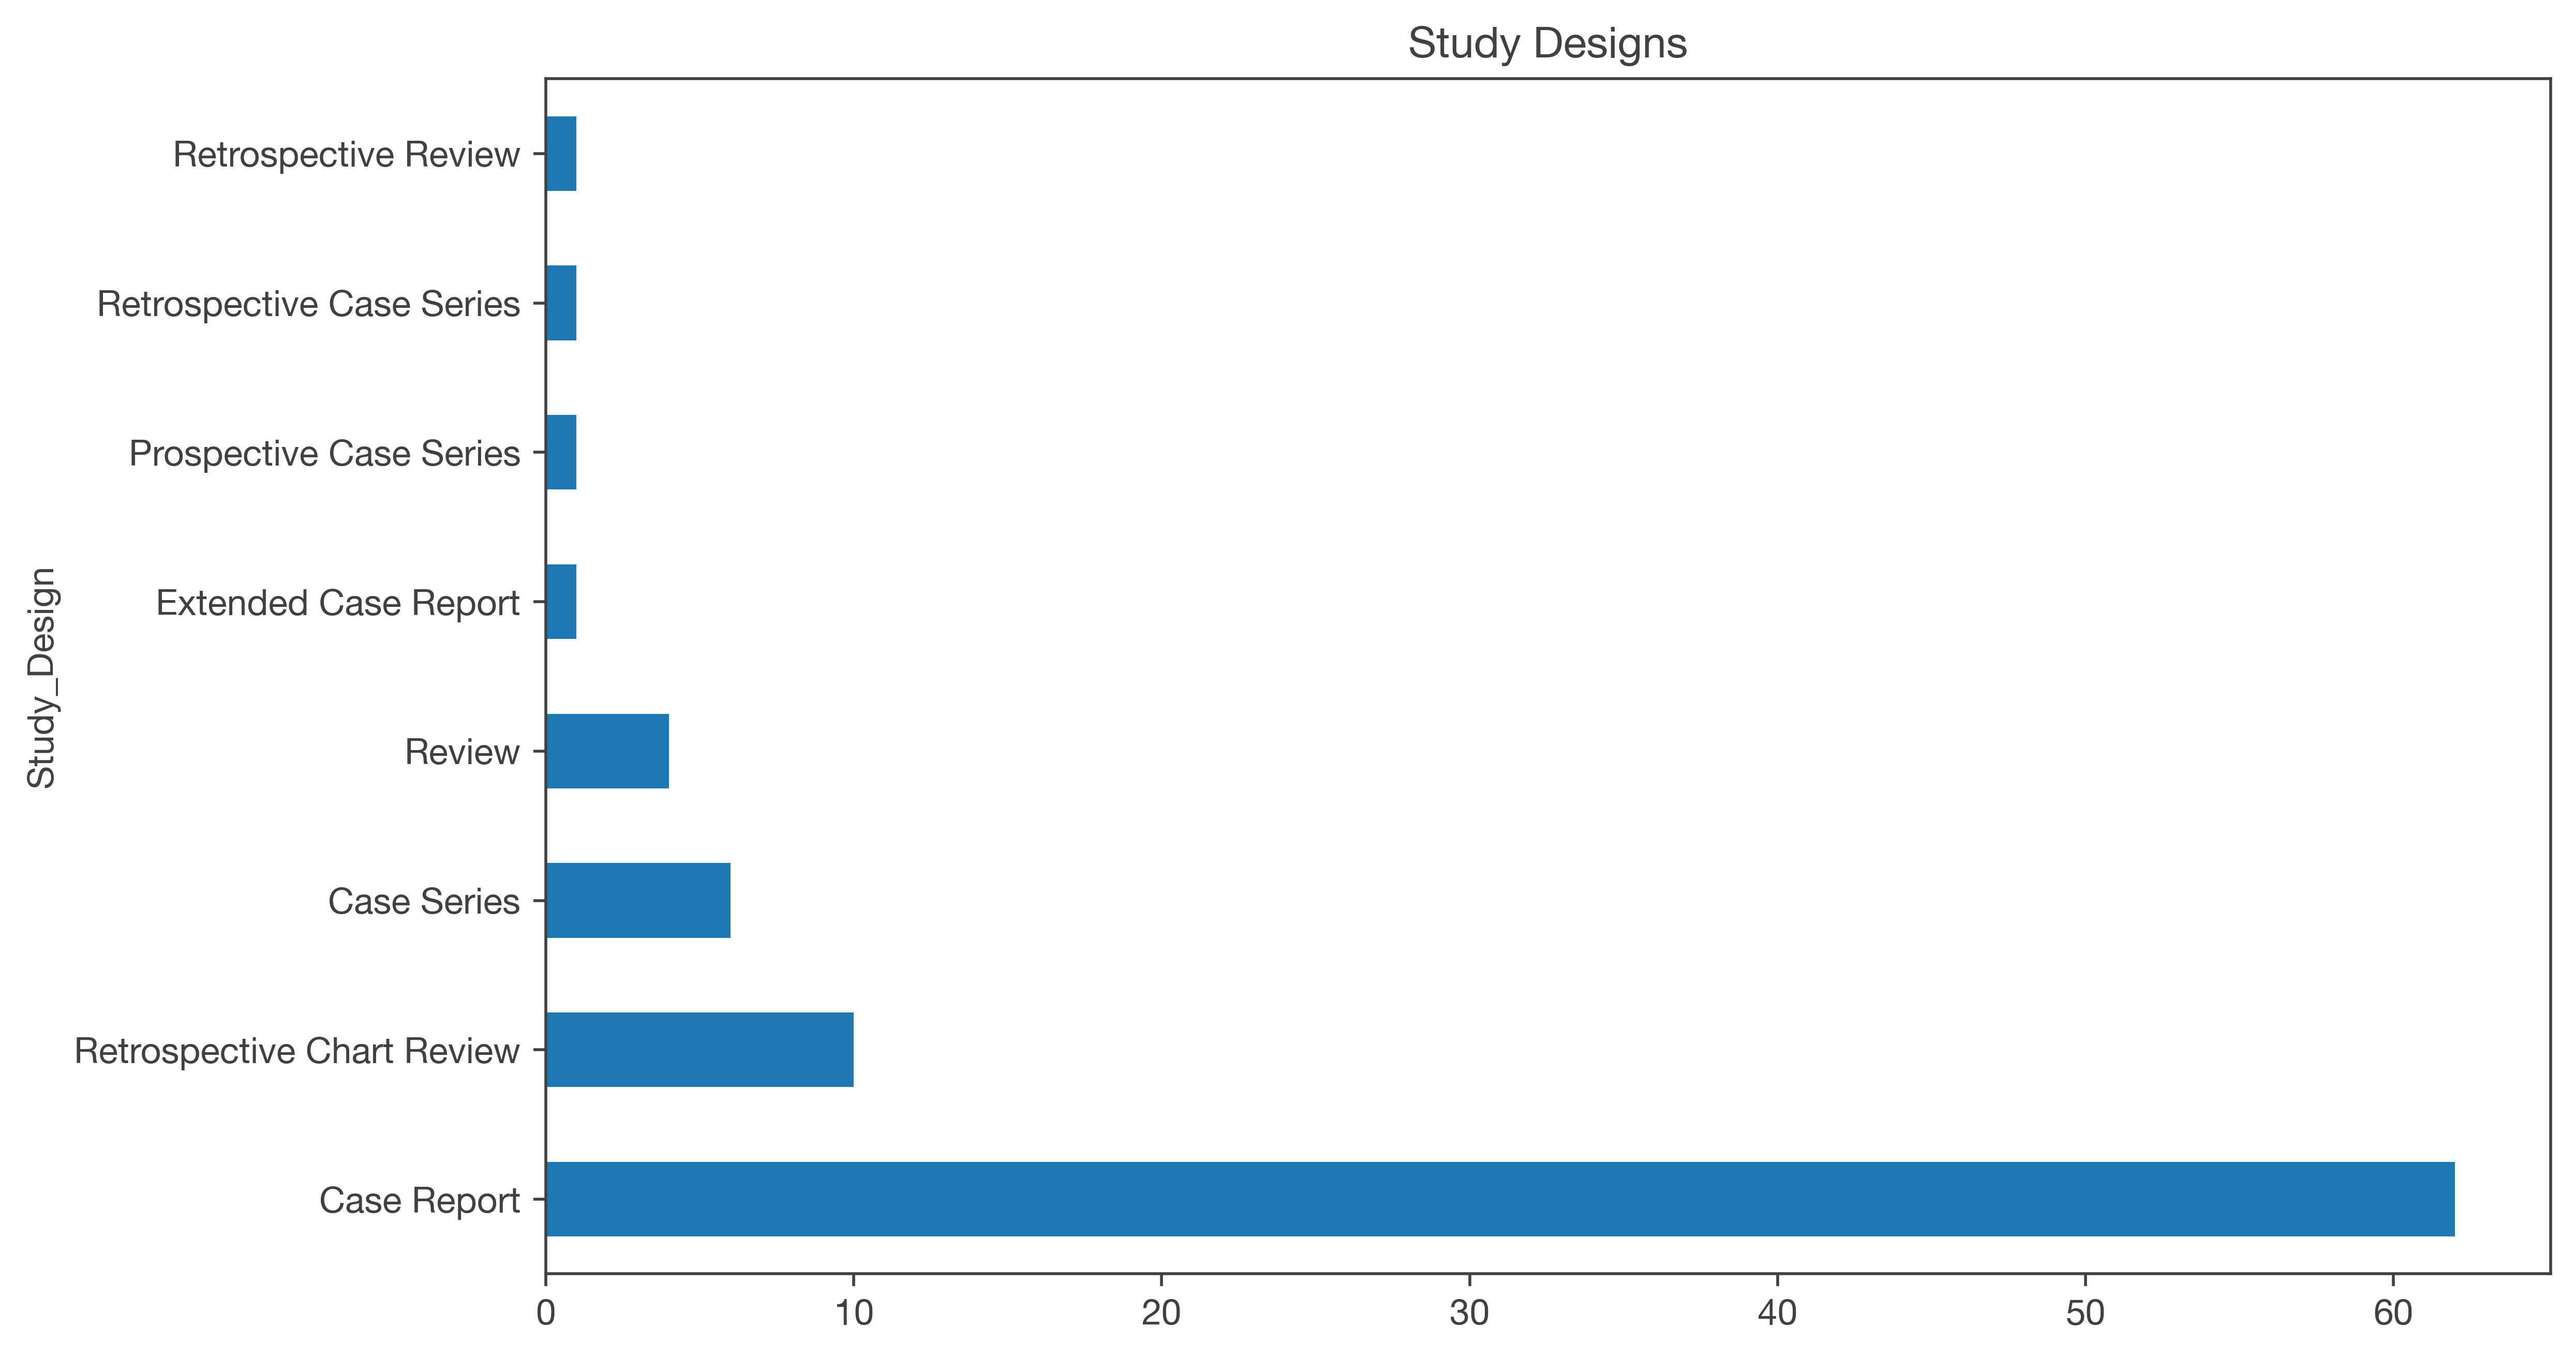

In [50]:
included_data['Study_Design'].value_counts().plot(kind='barh', title='Study Designs')

<Axes: title={'center': 'Publication Years'}, xlabel='Publication_Year'>

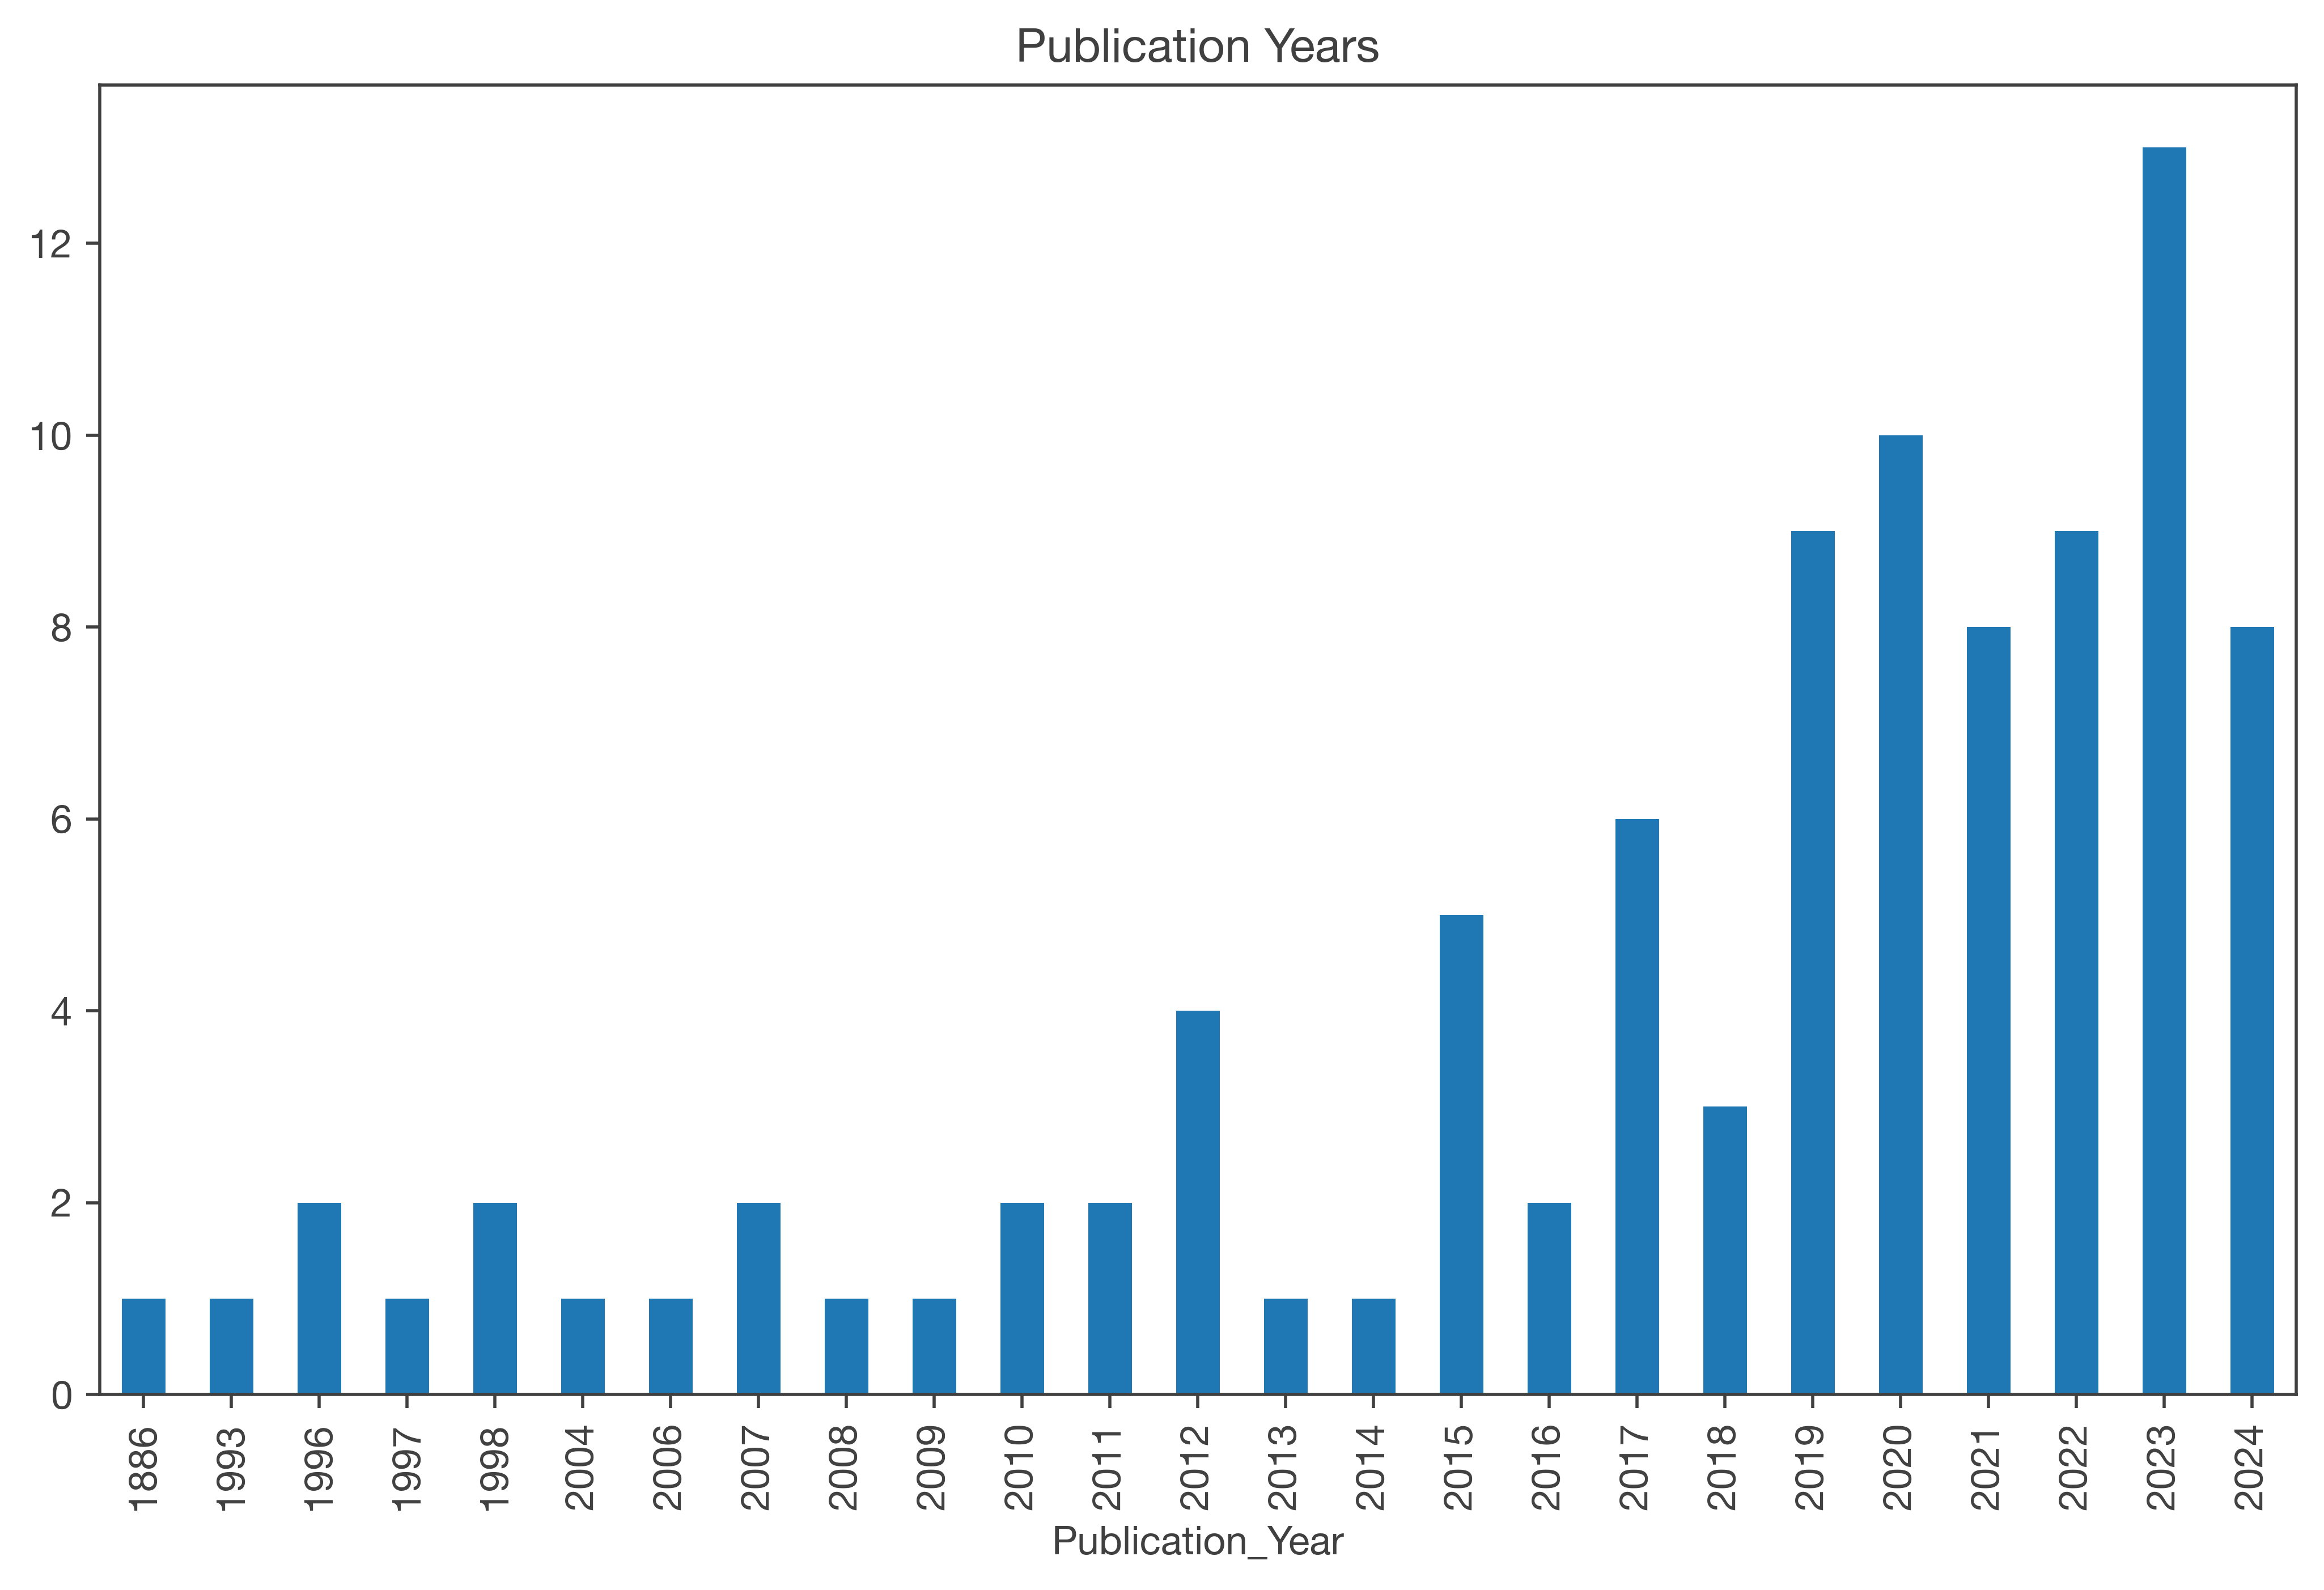

In [51]:
included_data['Publication_Year'].value_counts().sort_index().plot(kind='bar', title='Publication Years')

<Axes: title={'center': 'Population Types'}, ylabel='Population_Type'>

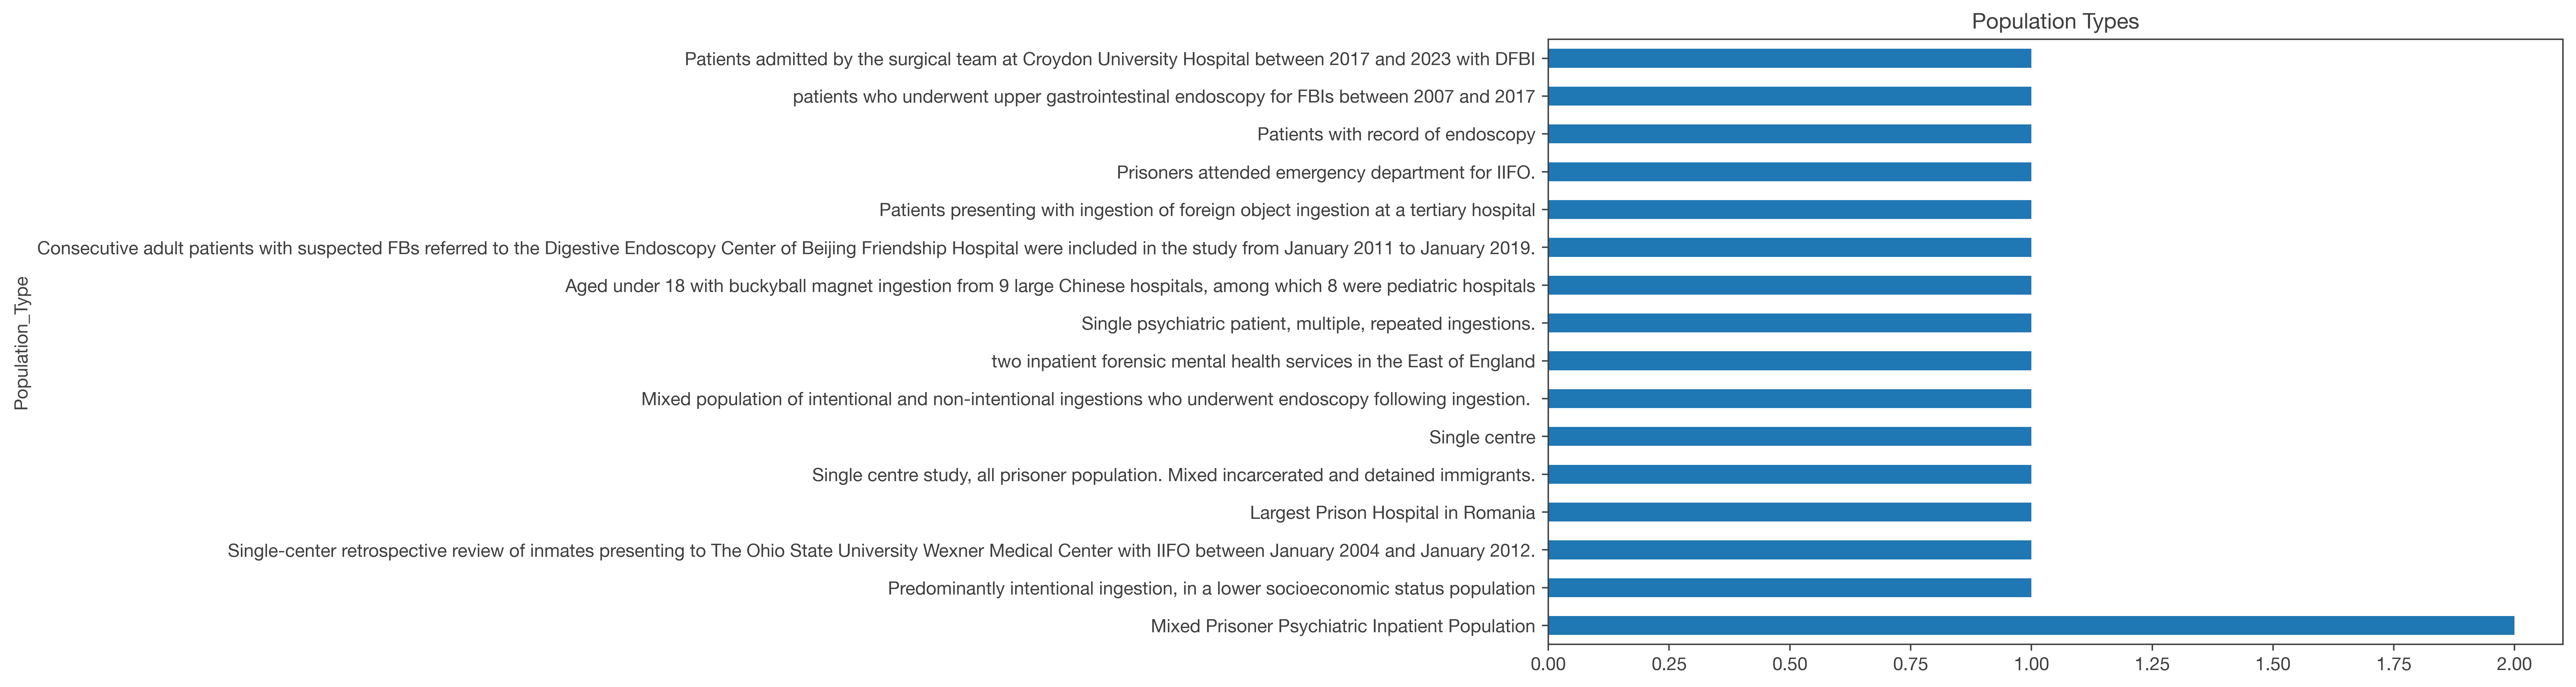

In [52]:
included_data['Study_Setting'].value_counts().plot(kind='barh', title='Study Settings')
included_data['Population_Type'].value_counts().plot(kind='barh', title='Population Types')

In [53]:
total_patients = included_data['Patient_Count'].sum()
total_cases = included_data['Case_Count'].sum()

<Axes: title={'center': 'Verified Ingestion Rate'}>

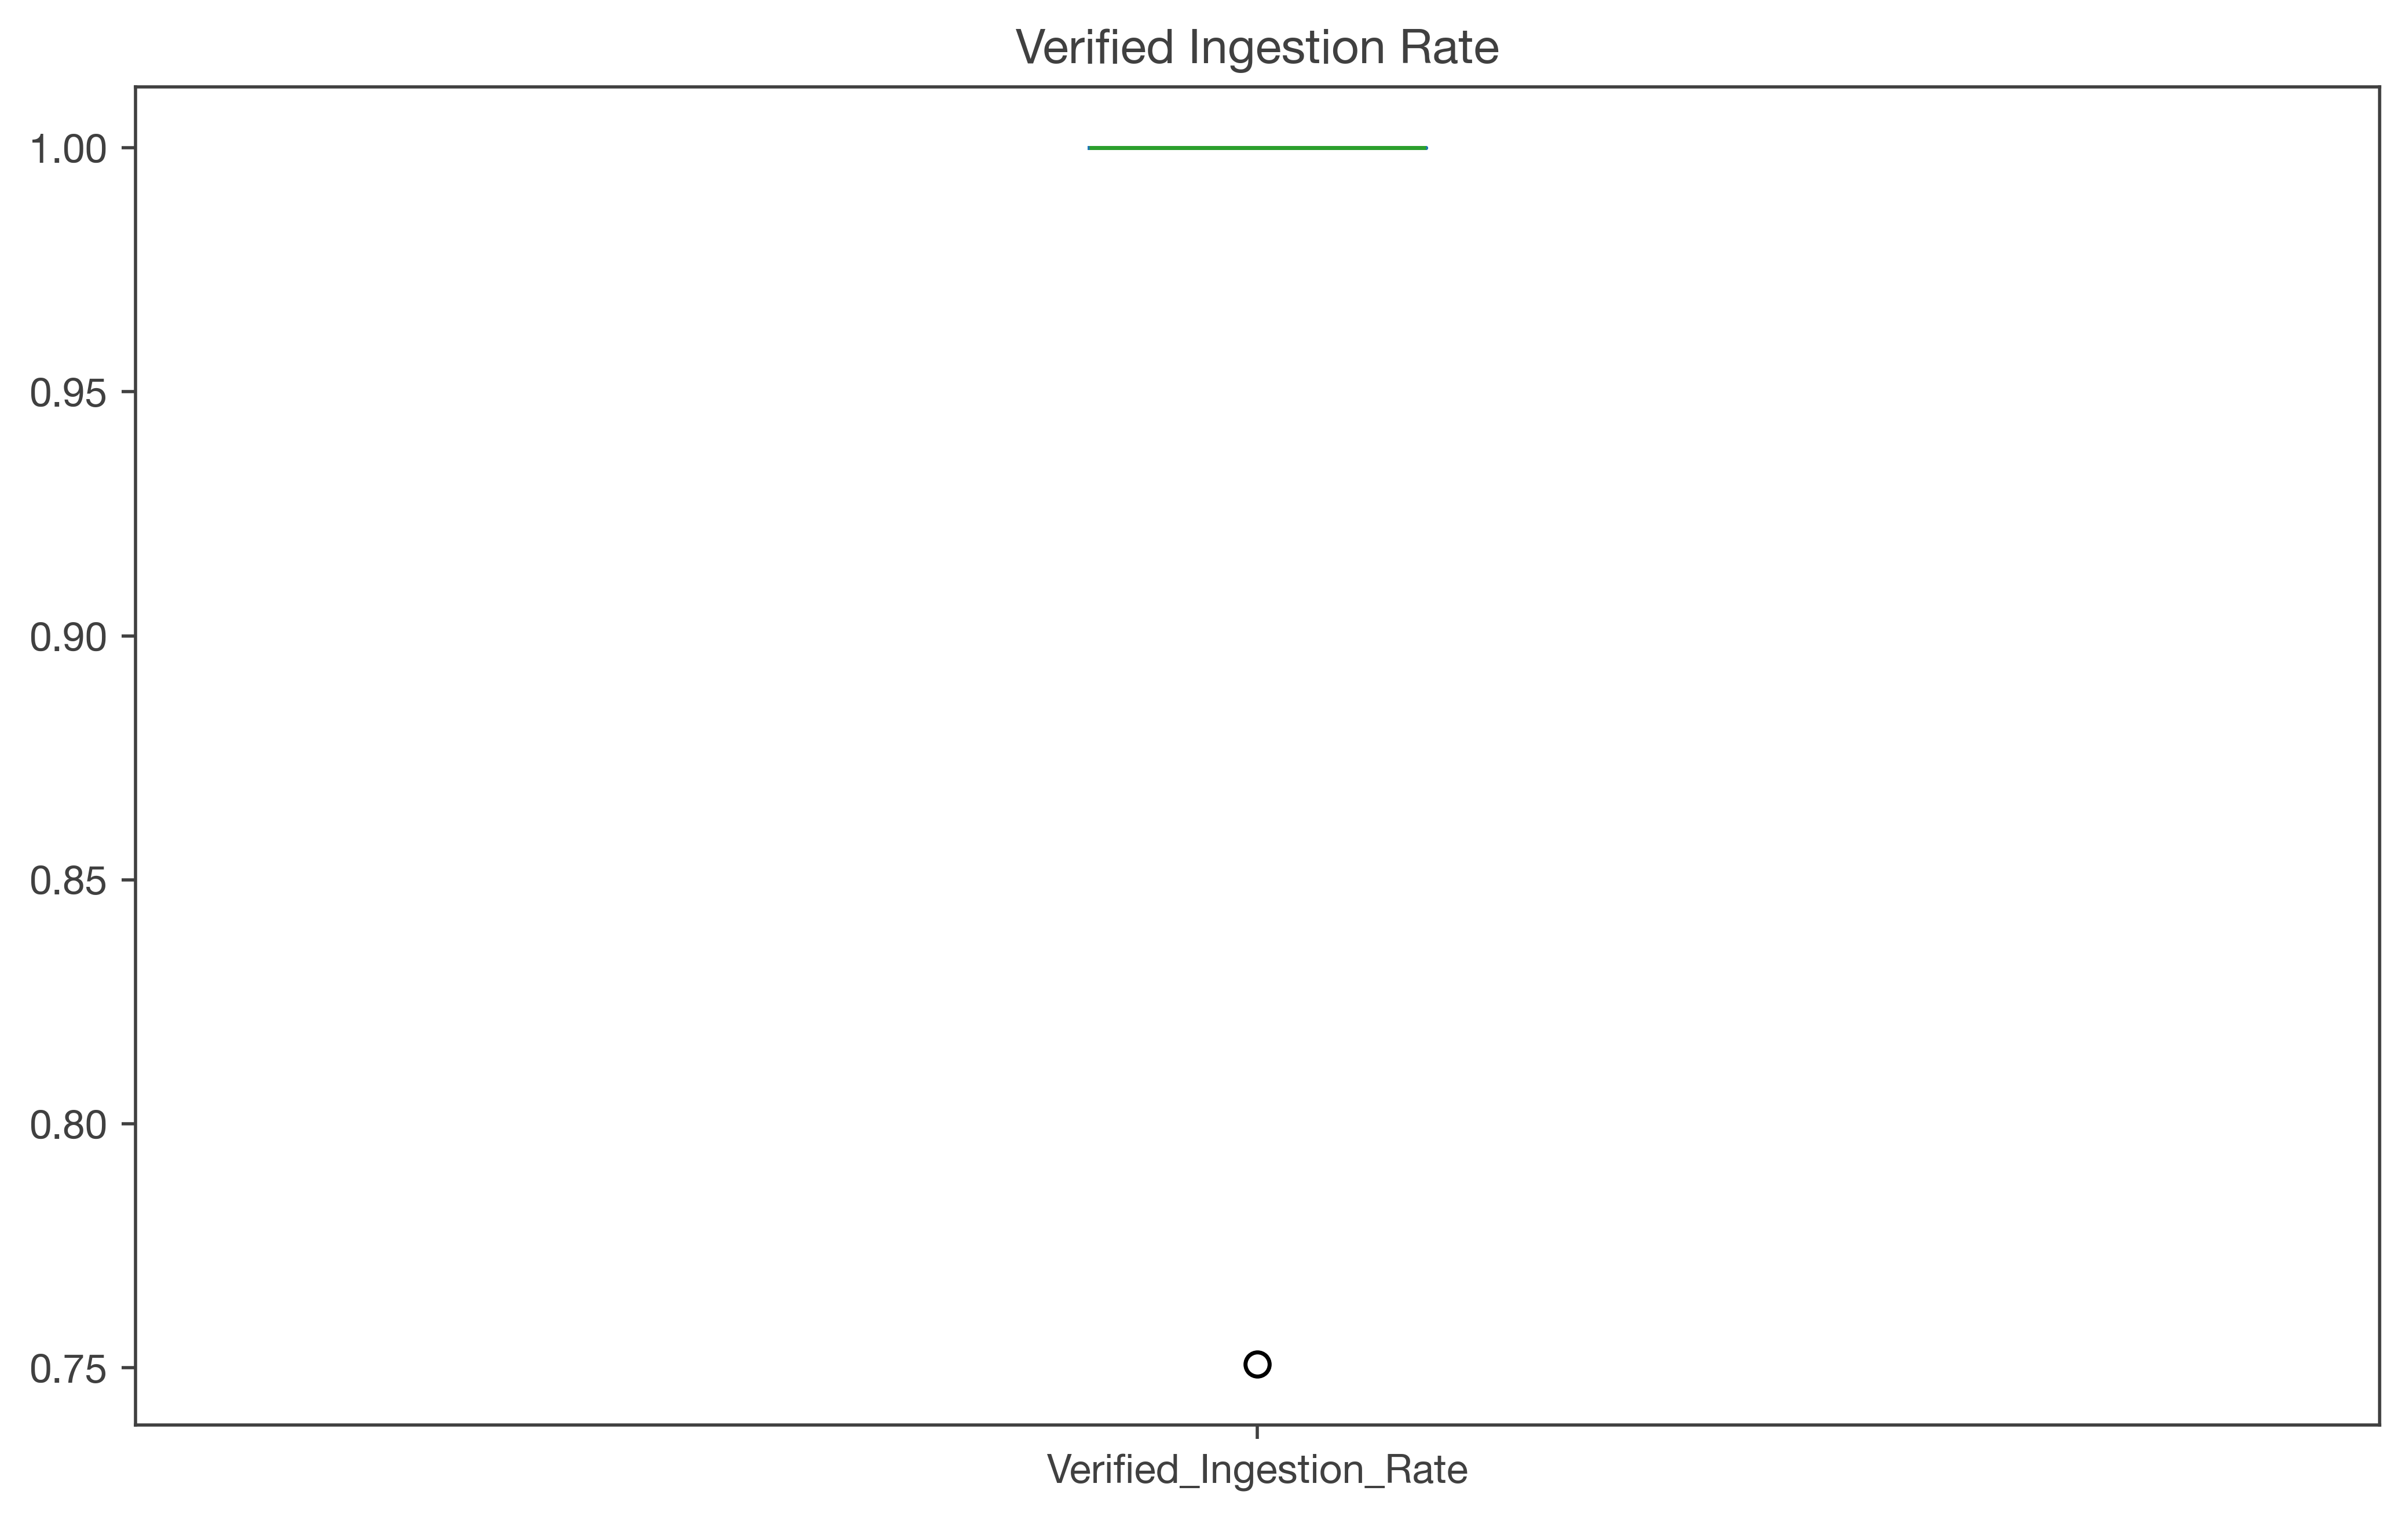

In [54]:
included_data['Verified_Ingestion_Rate'].dropna().plot(kind='box', title='Verified Ingestion Rate')

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, len(included_data) * 0.5))
for i, row in included_data.iterrows():
    plt.hlines(i, row['Age_Low'], row['Age_High'], color='gray', linewidth=4)
    plt.plot(row['Age_Mean'], i, 'o', color='blue', label='Mean' if i == 0 else "")
    if pd.notna(row['Age_Median']):
        plt.plot(row['Age_Median'], i, 'x', color='red', label='Median' if i == 0 else "")

plt.yticks(range(len(included_data)), included_data['First_Author'] + ' (' + included_data['Publication_Year'].astype(str) + ')')
plt.xlabel('Age')
plt.title('Age Range, Mean, and Median Across Studies')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Average Gender Distribution Across Studies'}>

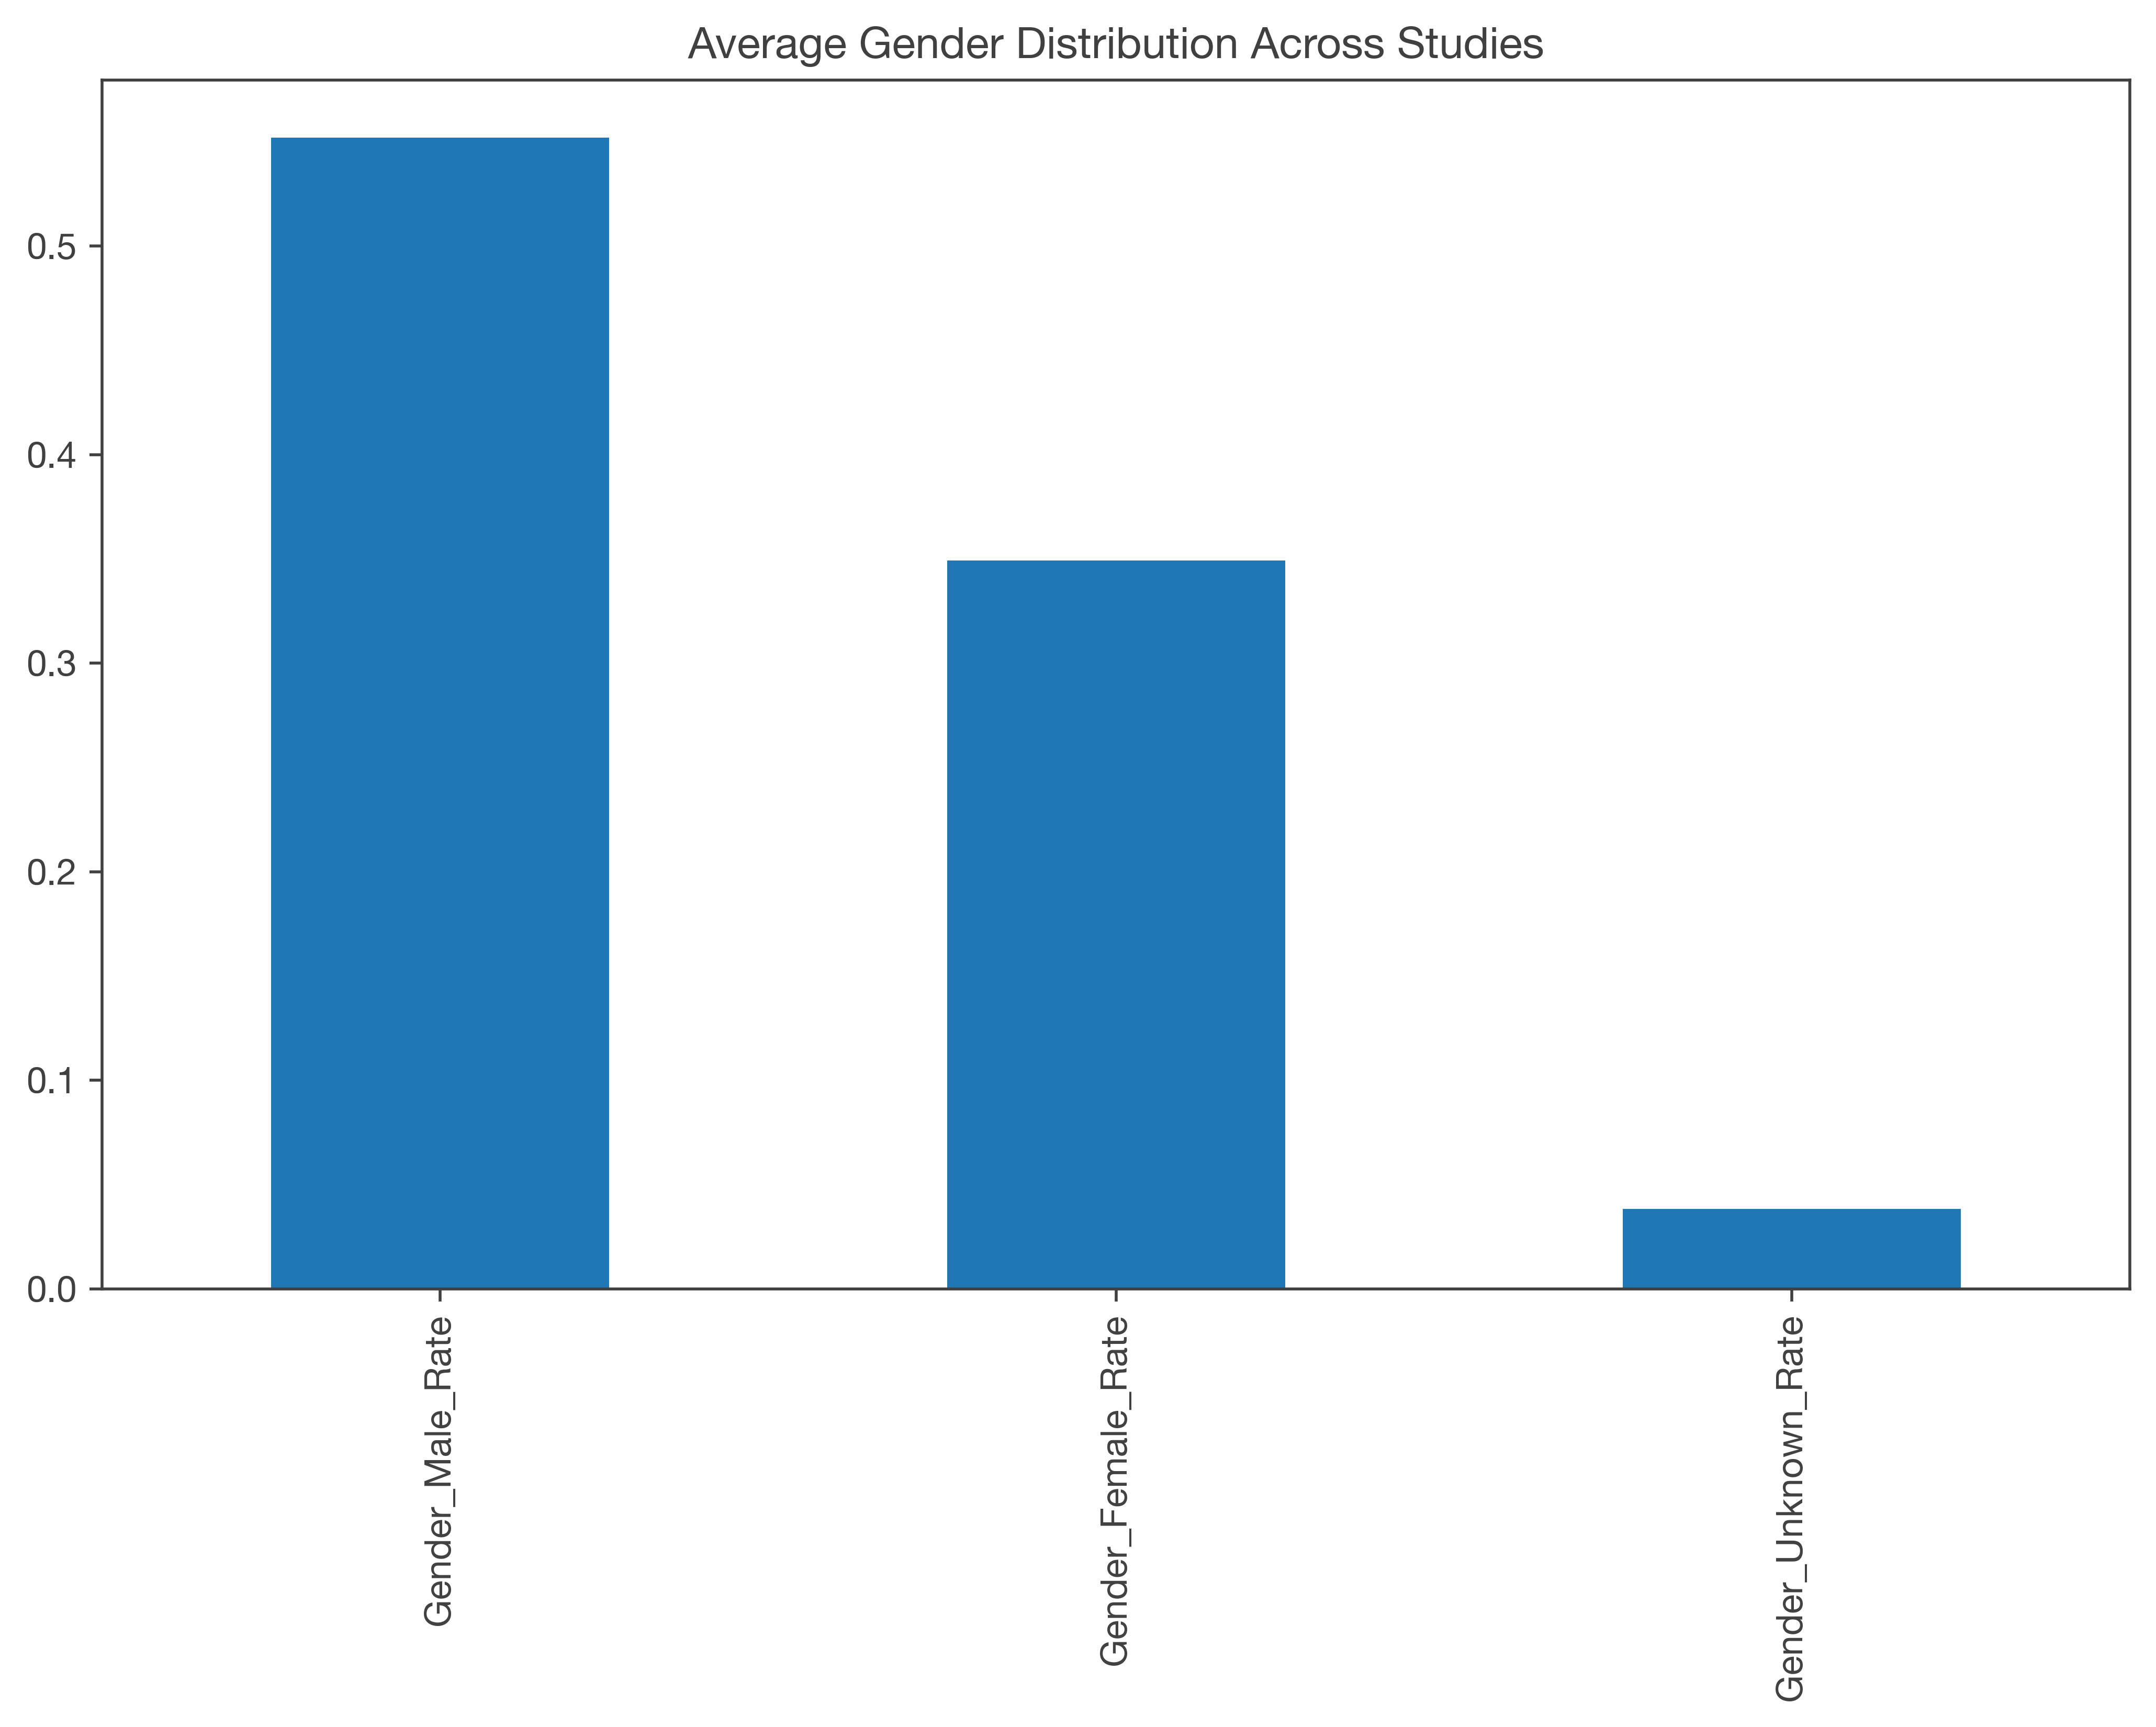

In [56]:
gender_cols = ['Gender_Male_Rate', 'Gender_Female_Rate', 'Gender_Unknown_Rate']
included_data[gender_cols].mean().plot(kind='bar', title='Average Gender Distribution Across Studies')

<Axes: title={'center': 'Average Rates of Risk Factors'}>

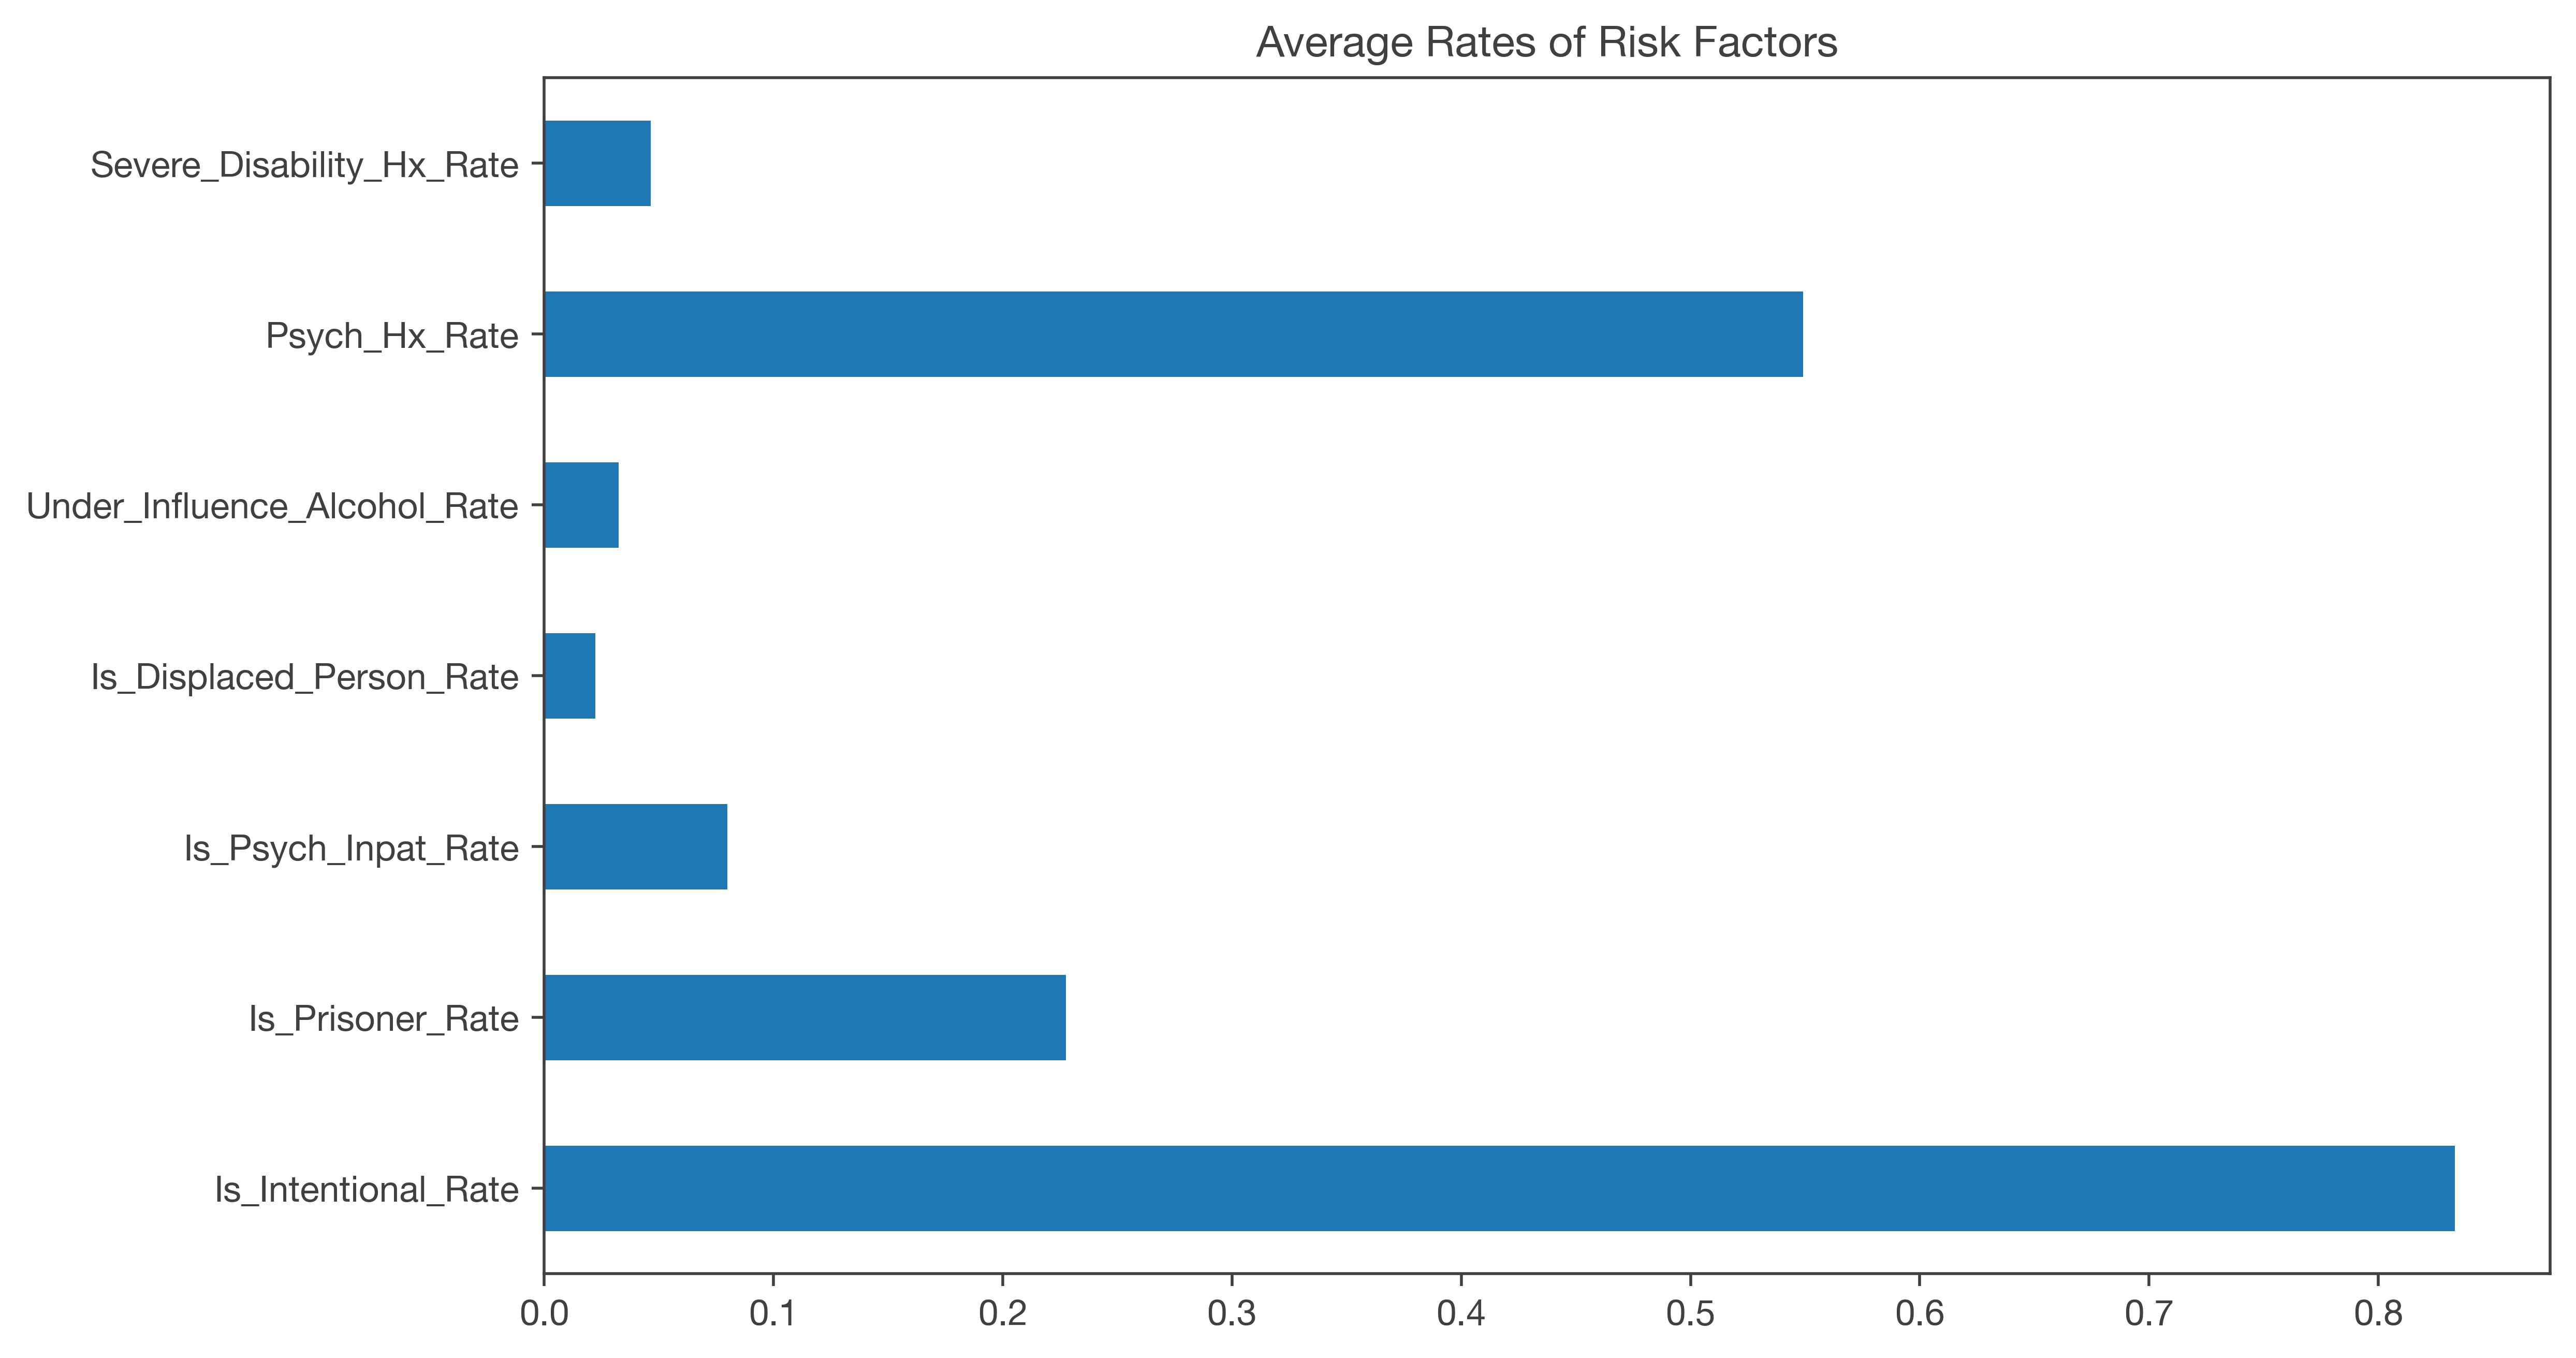

In [57]:
risk_factors = [
    'Is_Intentional_Rate', 'Is_Prisoner_Rate', 'Is_Psych_Inpat_Rate', 'Is_Displaced_Person_Rate',
    'Under_Influence_Alcohol_Rate', 'Psych_Hx_Rate', 'Severe_Disability_Hx_Rate'
]
included_data[risk_factors].mean().plot(kind='barh', title='Average Rates of Risk Factors')

<Axes: title={'center': 'Motivation Categories (Avg. Rates)'}>

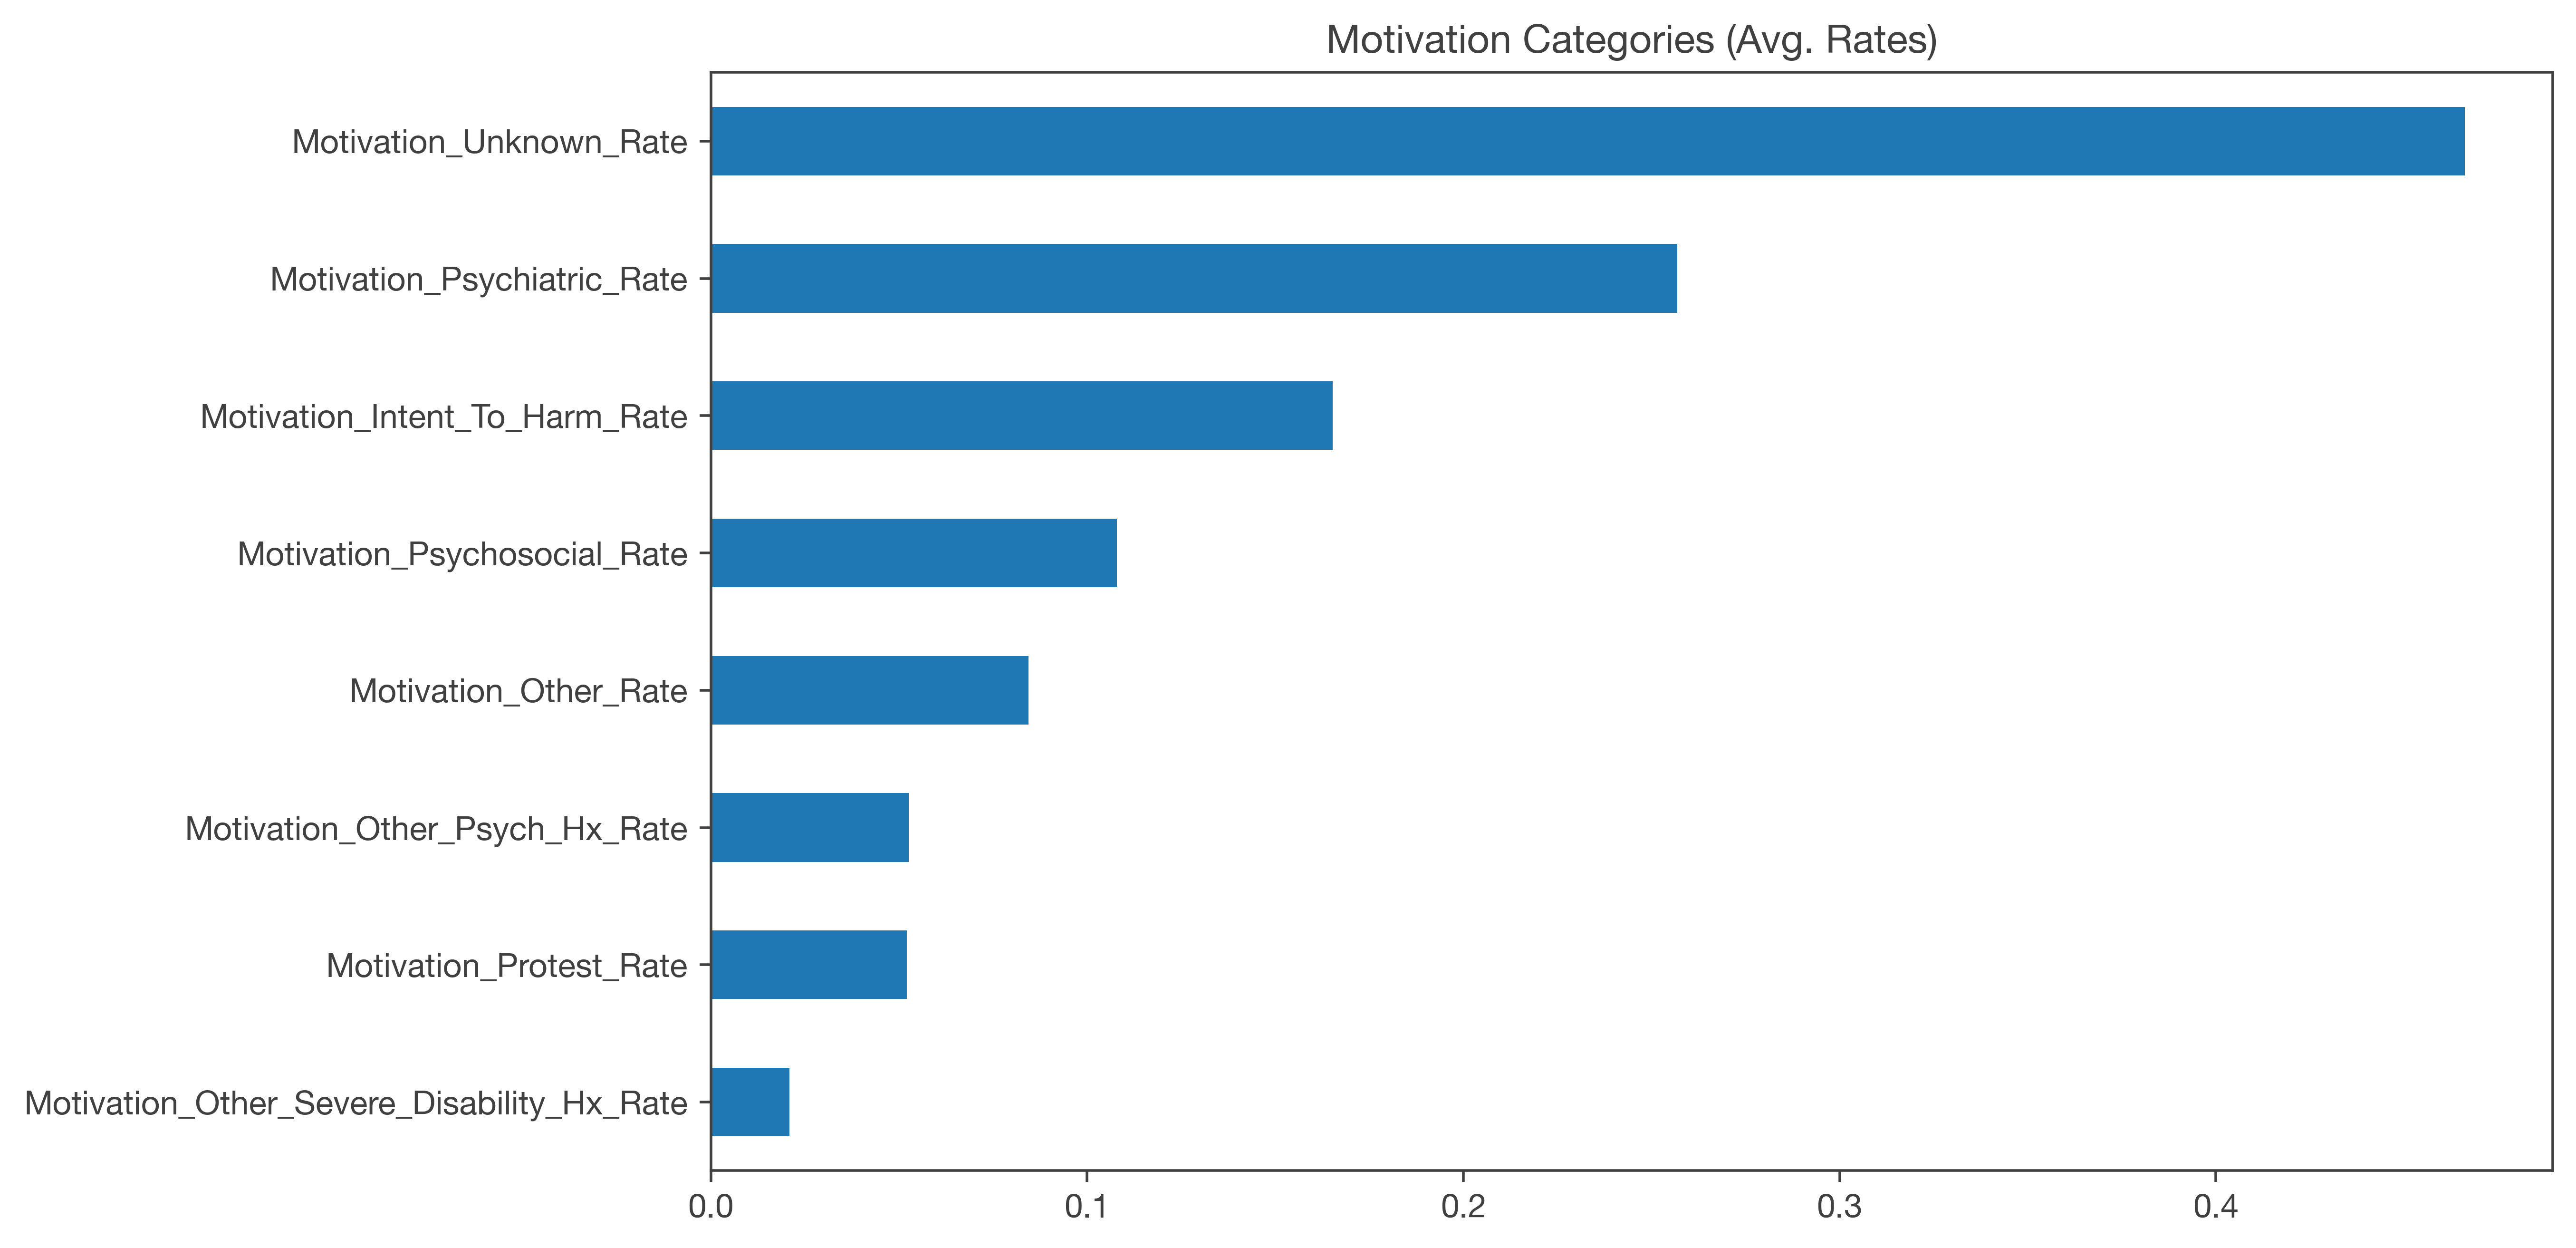

In [58]:
motivation_cols = [col for col in included_data.columns if col.startswith('Motivation_') and col.endswith('_Rate')]
included_data[motivation_cols].mean().sort_values().plot(kind='barh', title='Motivation Categories (Avg. Rates)')

<Axes: title={'center': 'Ingested Object Types (Avg. Rates)'}>

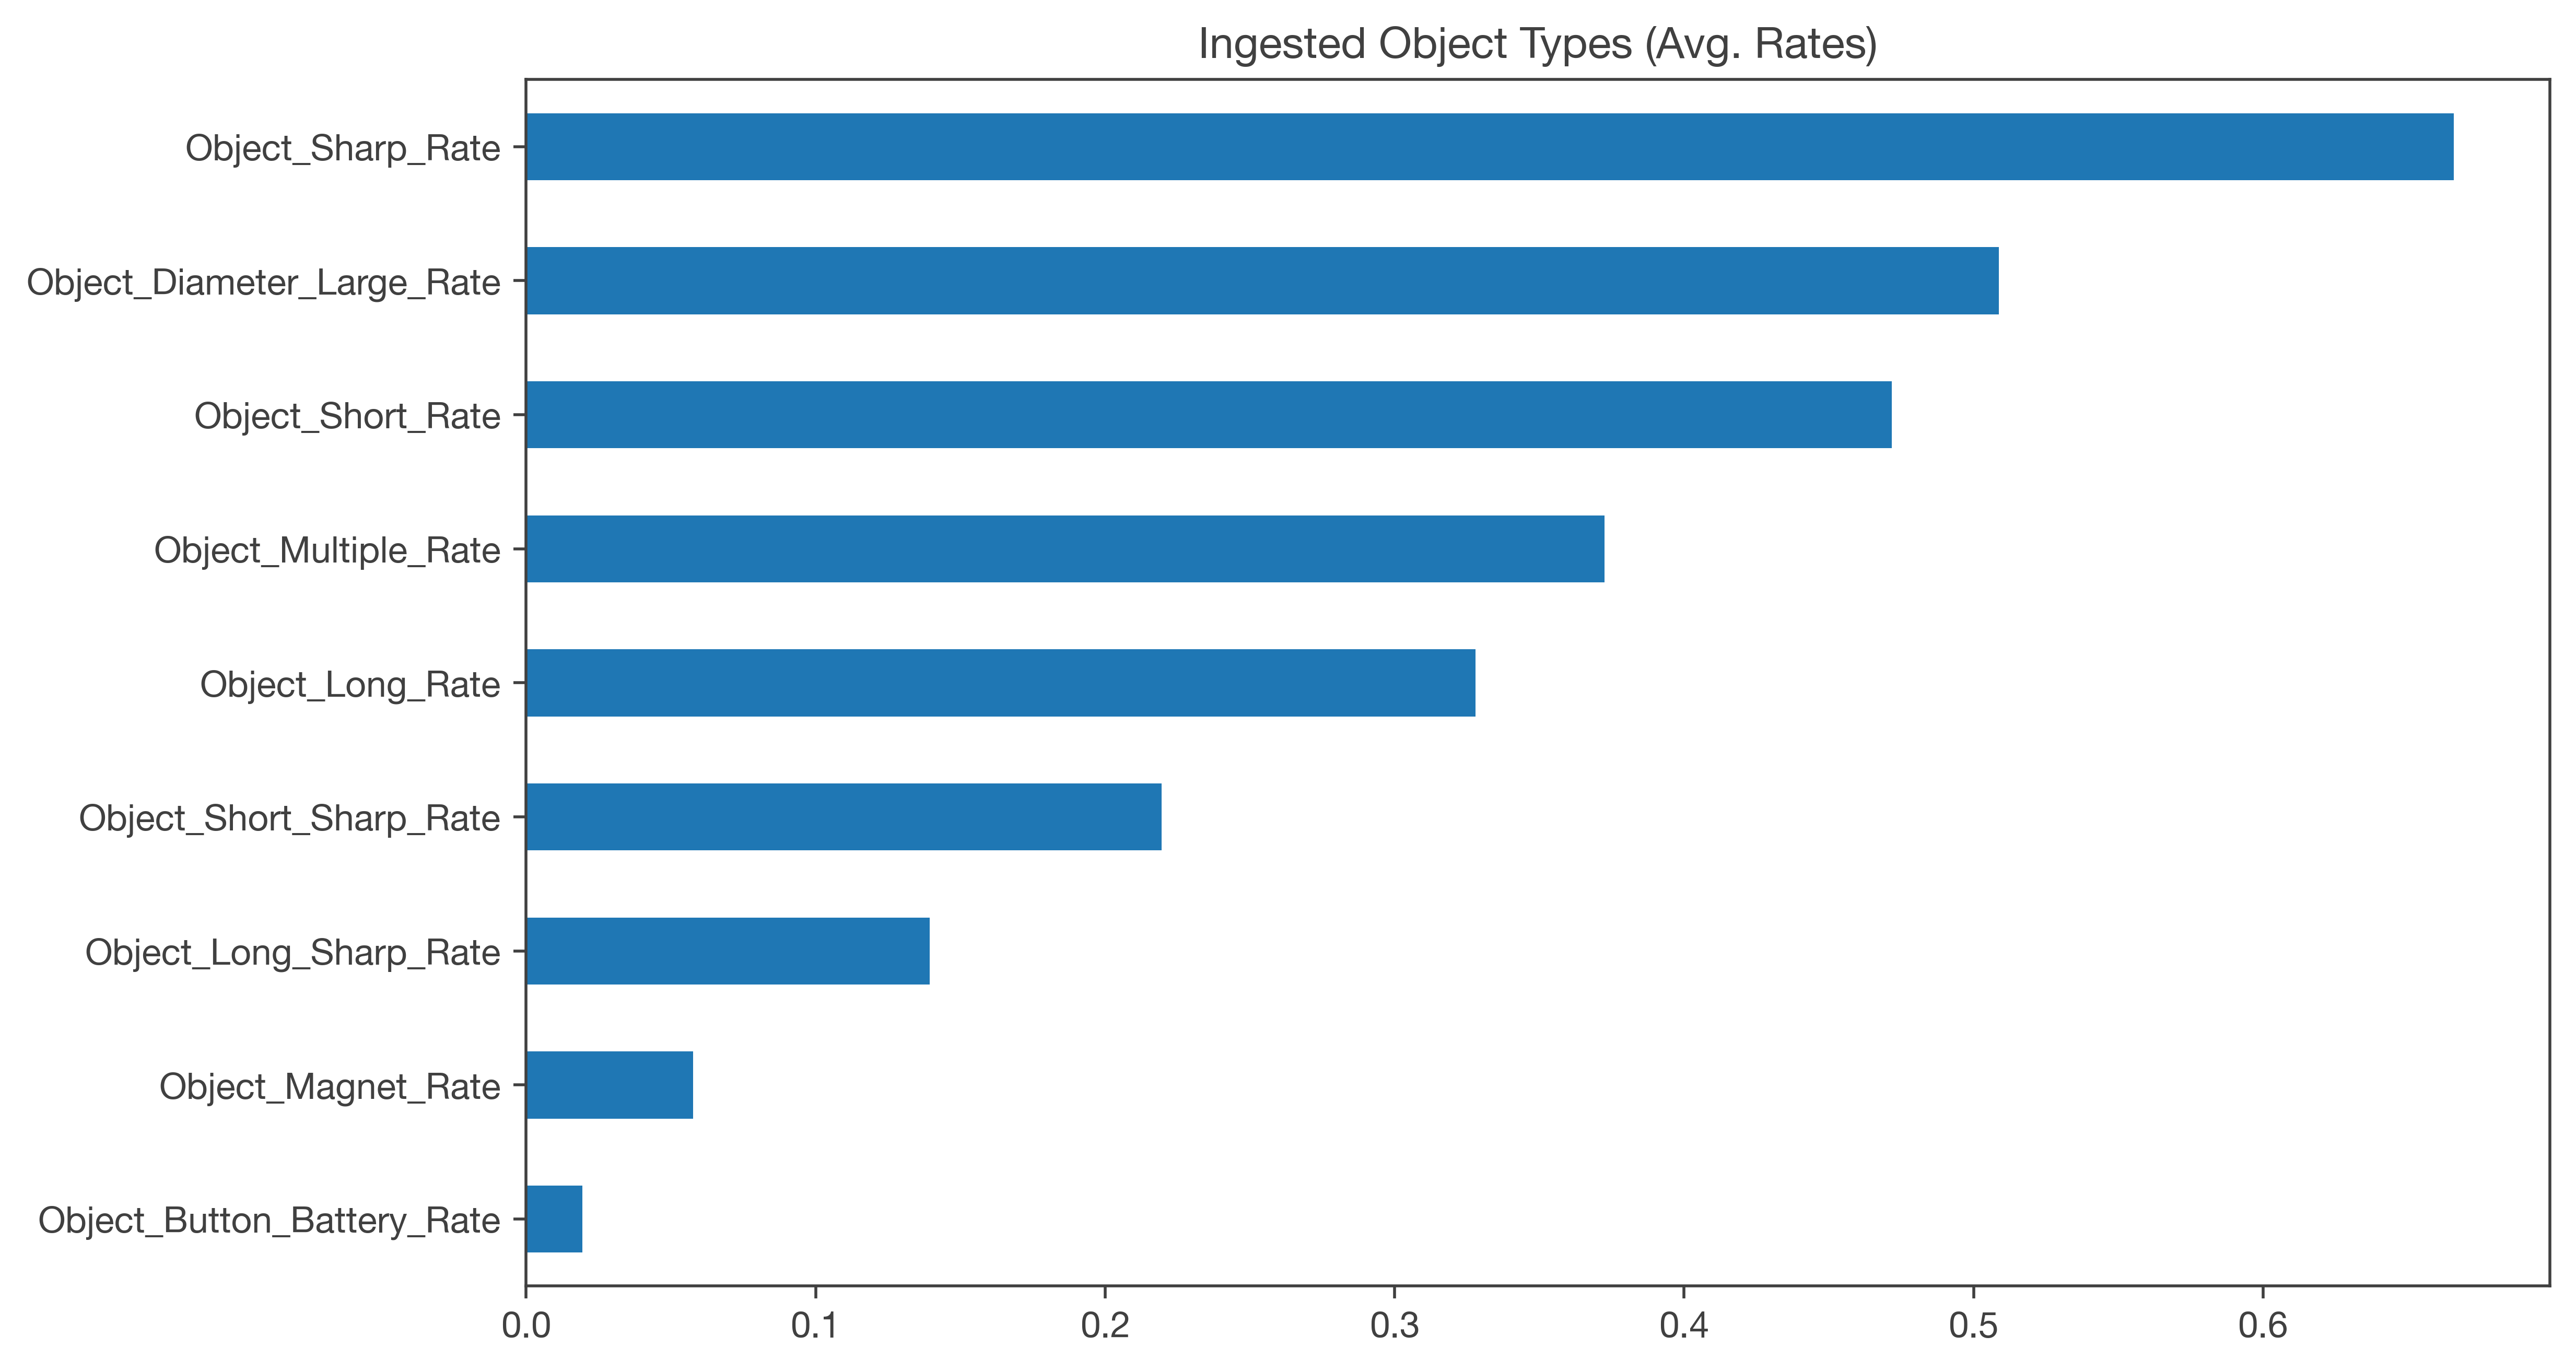

In [59]:
object_cols = [col for col in included_data.columns if col.startswith('Object_') and col.endswith('_Rate')]
included_data[object_cols].mean().sort_values().plot(kind='barh', title='Ingested Object Types (Avg. Rates)')

<Axes: title={'center': 'Outcomes (Avg. Rates)'}>

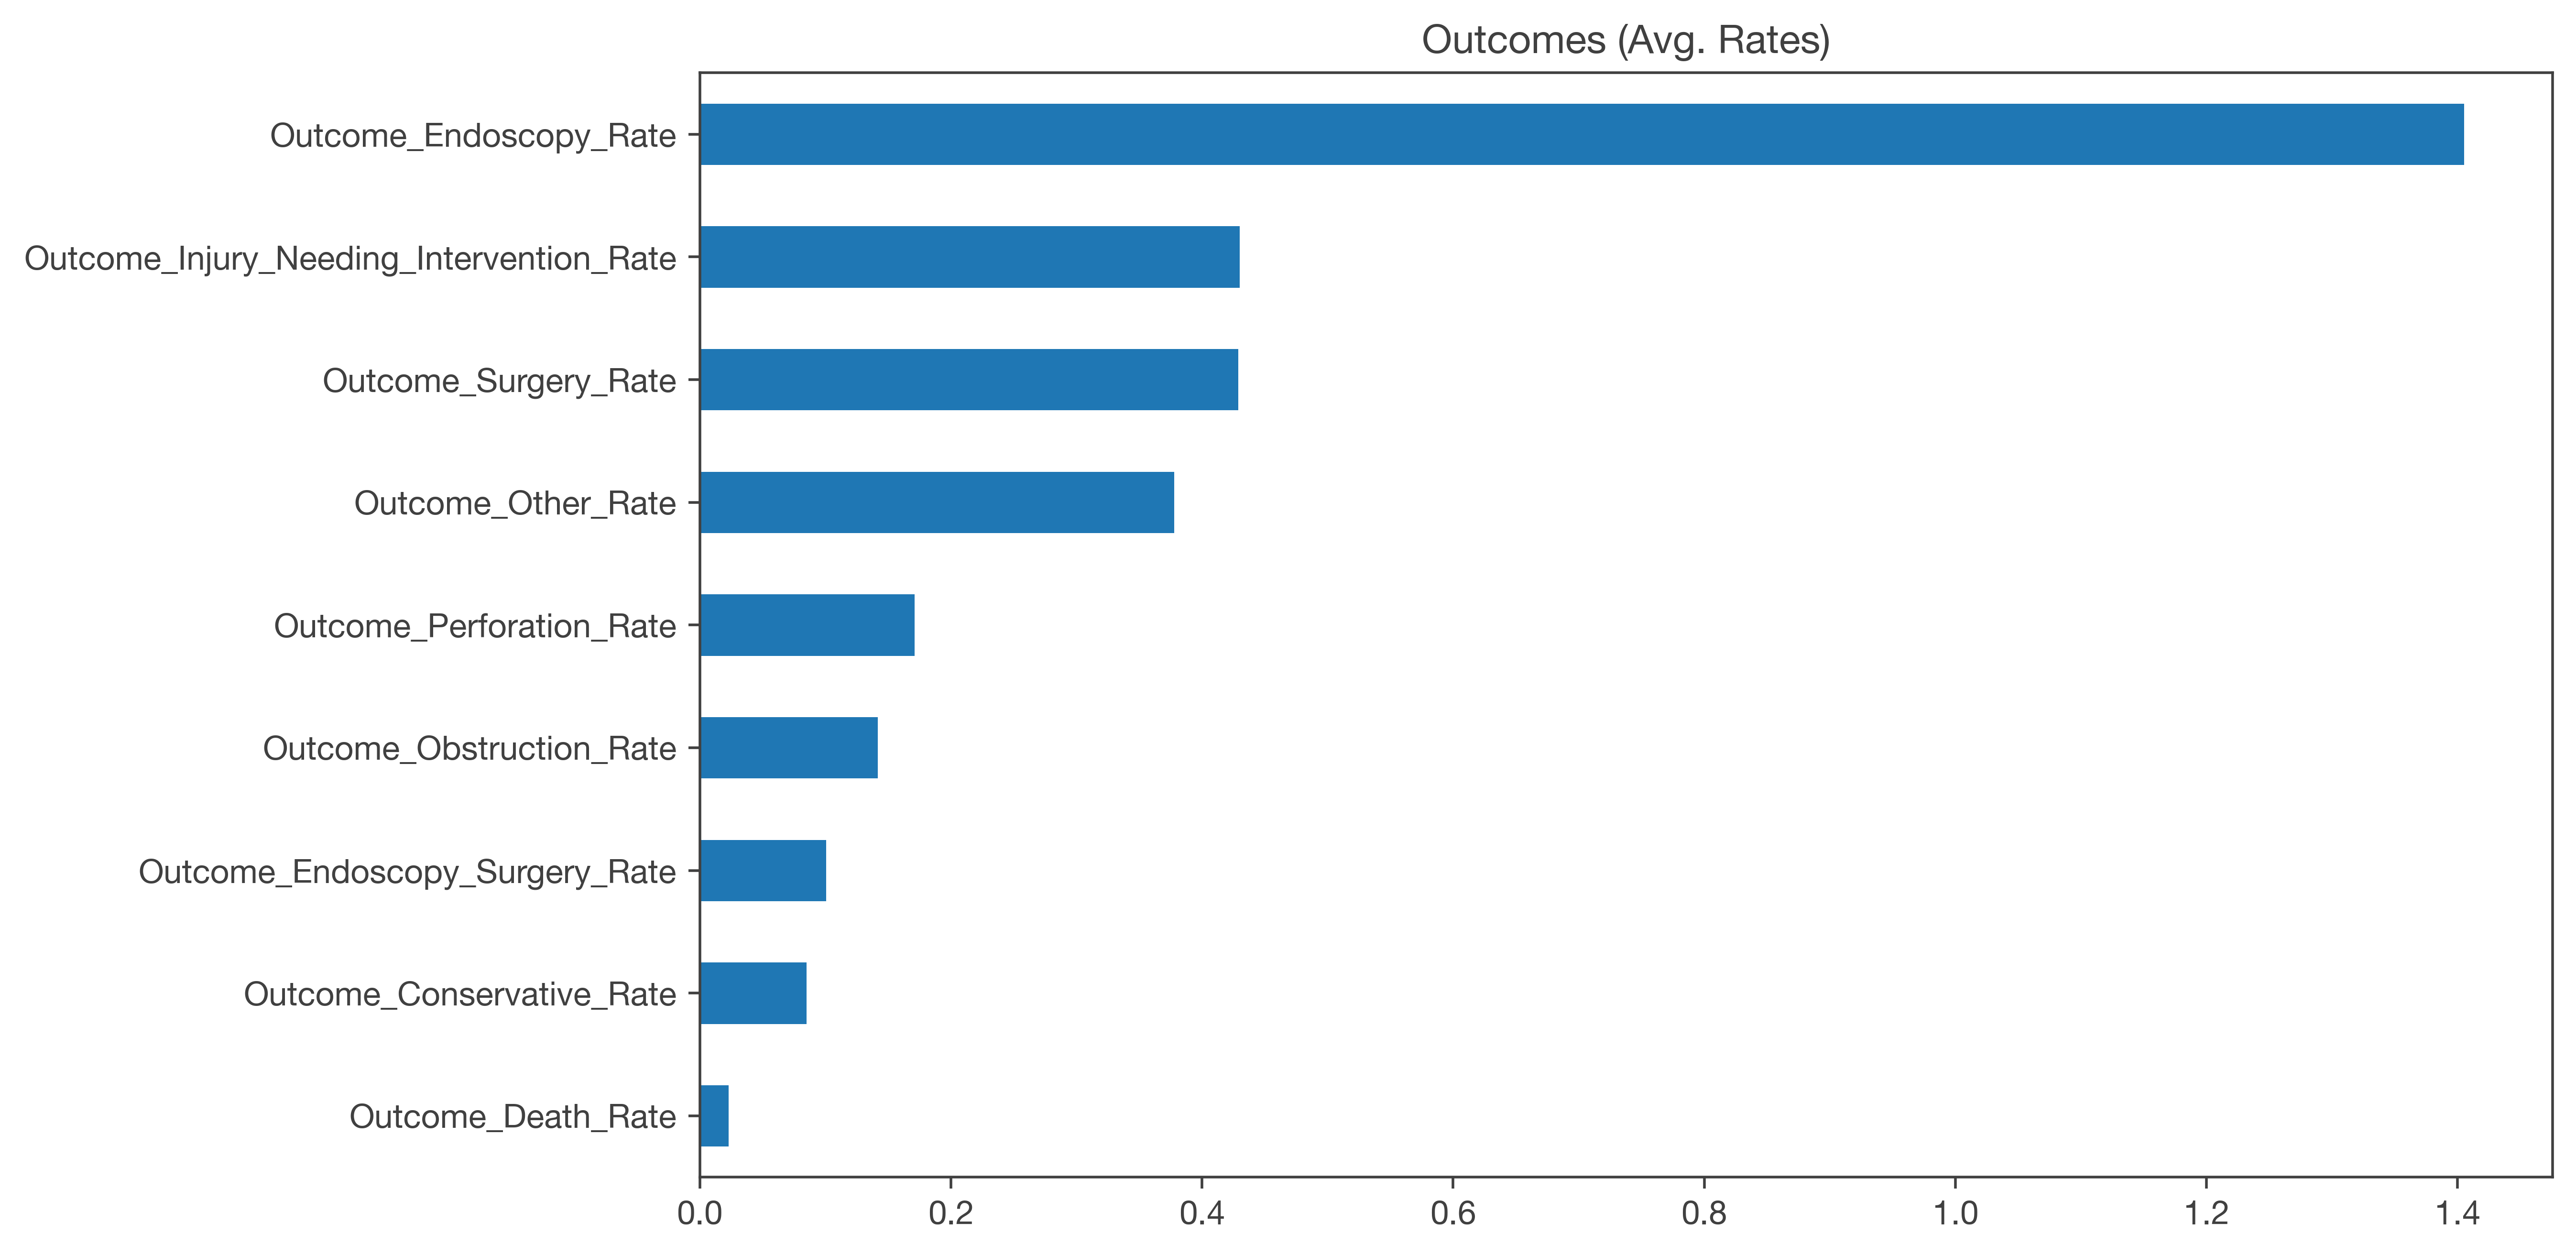

In [60]:
outcome_cols = [col for col in included_data.columns if col.startswith('Outcome_') and col.endswith('_Rate')]
included_data[outcome_cols].mean().sort_values().plot(kind='barh', title='Outcomes (Avg. Rates)')